# Creación de Tabla Cliente

Para el ***insert*** de la tabla del proveedor utilizaremos primero la pagina web https://mockaroo.com/.

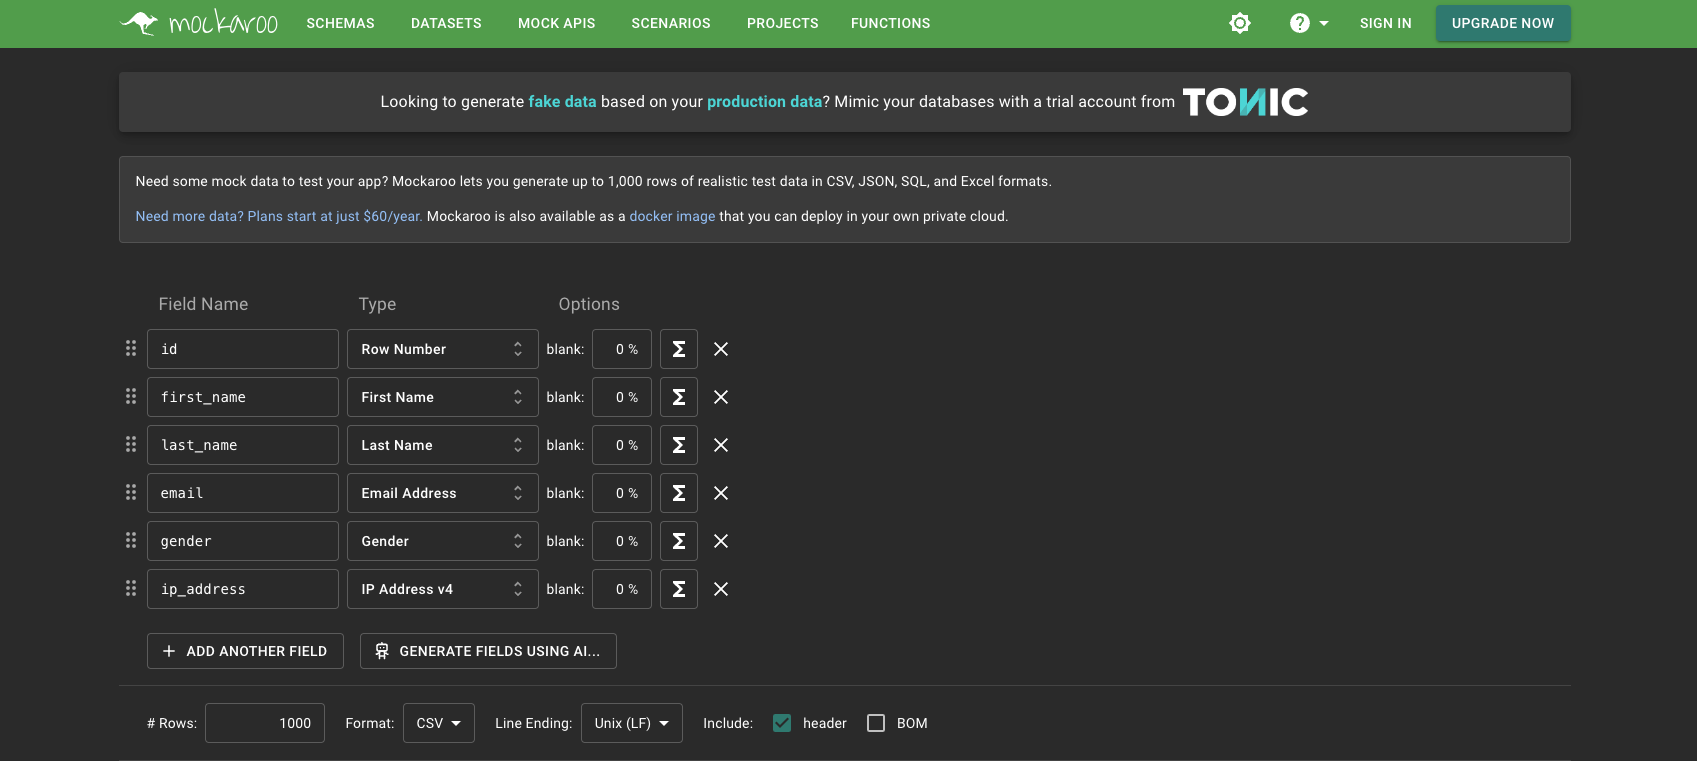

## Importamos las librerias 

Para este ipynb utilizaremos las siguientes librerias:
* **pandas**: para poder manipular y crear dataframes los cuales utilizaremos para un manejo más facil para poder insertar los datos en SQL
* **os**: para poder saber el working directory en el cual estamos trabajando
* **random**: para poder ir variando al azar la ubicación de donde provienen las personas o empresas y poder crear correos al azar con domains validos.

In [1]:
import pandas as pd
import os
import random

## Importamos el dataset

### importamos el dataset de Mockaroo, en el cual solo incluimos las personas con cedula fisica (9 digitos en la cedula)

In [13]:
data = pd.read_csv("Clientes_fisica.csv")

In [14]:
data

,id,first_name,last_name,telefono
0,7-7171-3010,Sampson,Pinch,+506 8261-1785
1,2-5447-8089,Ellis,Lassetter,+506 9318-6041
2,0-0052-0484,Gabbey,Estable,+506 2829-0794
3,1-7871-4046,Geneva,Huyge,+506 0493-5950
4,4-2436-9404,Kenon,Redington,+506 3868-9037
...,...,...,...,...
95,8-9332-9239,Yehudi,Haccleton,+506 3491-5536
96,7-3065-4623,Jennica,Mimmack,+506 3603-0281
97,5-0192-3753,Federica,Snowden,+506 6247-8215
98,6-4293-4362,Ewen,Sissel,+506 8767-8904


Juntamos el primer nombre con el apellido en una columna llamada nombre

In [15]:
data['nombre'] = data[['first_name','last_name']].apply(lambda x: ' '.join(x), axis=1)

Creamos una lista de correos la cual se utilizara para generar los domains de los correos random, esta con la libreria random

In [16]:
correos = ['@gmail.com','@hotmail.com','@outlook.com','@yahoo.com']

Ahora creamos la columna de email, en la cual agarramos el primer nombre y lo combinamos el apellido con un _ y despues lo juntamos al azar con algún domain de la tabla correos

In [17]:
data['email'] = data[['first_name','last_name']].apply(lambda x: '_'.join(x)+f'{random.choice(correos)}', axis=1)

In [18]:
data.drop(columns=['first_name','last_name'],inplace = True)

In [19]:
data["tipo de cedula"] = "Fisica"

In [20]:
data.head()

,id,telefono,nombre,email,tipo de cedula
0,7-7171-3010,+506 8261-1785,Sampson Pinch,Sampson_Pinch@outlook.com,Fisica
1,2-5447-8089,+506 9318-6041,Ellis Lassetter,Ellis_Lassetter@gmail.com,Fisica
2,0-0052-0484,+506 2829-0794,Gabbey Estable,Gabbey_Estable@outlook.com,Fisica
3,1-7871-4046,+506 0493-5950,Geneva Huyge,Geneva_Huyge@hotmail.com,Fisica
4,4-2436-9404,+506 3868-9037,Kenon Redington,Kenon_Redington@outlook.com,Fisica


In [21]:
data_empresas = pd.read_csv("Clientes_juridica.csv")

In [22]:
data_empresas.head()

,id,telefono,nombre
0,6-8372-47180,+506 0007-6542,Photobean
1,6-1324-78771,+506 9658-2976,Kwimbee
2,3-2201-60864,+506 7693-9723,Geba
3,7-2176-92978,+506 2311-1357,Zoomlounge
4,8-4596-89425,+506 4424-7990,Blognation


In [23]:
data_empresas['email'] = data_empresas[['nombre']].apply(lambda x: x +f'{random.choice(correos)}', axis=1)

In [24]:
data_empresas["tipo de cedula"] = "Juridica"

In [25]:
data_empresas.head()

,id,telefono,nombre,email,tipo de cedula
0,6-8372-47180,+506 0007-6542,Photobean,Photobean@yahoo.com,Juridica
1,6-1324-78771,+506 9658-2976,Kwimbee,Kwimbee@hotmail.com,Juridica
2,3-2201-60864,+506 7693-9723,Geba,Geba@outlook.com,Juridica
3,7-2176-92978,+506 2311-1357,Zoomlounge,Zoomlounge@outlook.com,Juridica
4,8-4596-89425,+506 4424-7990,Blognation,Blognation@outlook.com,Juridica


In [26]:
data_final = pd.concat([data,data_empresas])

In [27]:
data_final.head()

,id,telefono,nombre,email,tipo de cedula
0,7-7171-3010,+506 8261-1785,Sampson Pinch,Sampson_Pinch@outlook.com,Fisica
1,2-5447-8089,+506 9318-6041,Ellis Lassetter,Ellis_Lassetter@gmail.com,Fisica
2,0-0052-0484,+506 2829-0794,Gabbey Estable,Gabbey_Estable@outlook.com,Fisica
3,1-7871-4046,+506 0493-5950,Geneva Huyge,Geneva_Huyge@hotmail.com,Fisica
4,4-2436-9404,+506 3868-9037,Kenon Redington,Kenon_Redington@outlook.com,Fisica


In [28]:
data_final.tail()

,id,telefono,nombre,email,tipo de cedula
95,6-4574-61686,+506 8309-7650,Izio,Izio@outlook.com,Juridica
96,7-2498-77422,+506 0779-1250,Edgepulse,Edgepulse@outlook.com,Juridica
97,7-0923-94891,+506 1518-9237,Oozz,Oozz@hotmail.com,Juridica
98,8-3043-30579,+506 1195-4317,Gigabox,Gigabox@gmail.com,Juridica
99,4-5962-33678,+506 5004-5403,Katz,Katz@hotmail.com,Juridica


In [19]:
data_final.to_csv("clientes.csv")

In [29]:
for i in range(data_final.shape[0]):
    print(f"('{data_final.iloc[i][0]}','{data_final.iloc[i][-1]}','{data_final.iloc[i][2]}','{data_final.iloc[i][3]}','{data_final.iloc[i][1]}'),")

('7-7171-3010','Fisica','Sampson Pinch','Sampson_Pinch@outlook.com','+506 8261-1785'),
('2-5447-8089','Fisica','Ellis Lassetter','Ellis_Lassetter@gmail.com','+506 9318-6041'),
('0-0052-0484','Fisica','Gabbey Estable','Gabbey_Estable@outlook.com','+506 2829-0794'),
('1-7871-4046','Fisica','Geneva Huyge','Geneva_Huyge@hotmail.com','+506 0493-5950'),
('4-2436-9404','Fisica','Kenon Redington','Kenon_Redington@outlook.com','+506 3868-9037'),
('3-2402-0796','Fisica','Zebulon Le Merchant','Zebulon_Le Merchant@outlook.com','+506 8312-5720'),
('7-0608-3892','Fisica','Gibby Elks','Gibby_Elks@hotmail.com','+506 2363-4583'),
('1-8891-7972','Fisica','Zelma Fewkes','Zelma_Fewkes@outlook.com','+506 9096-8954'),
('2-5340-7263','Fisica','Teirtza Schenfisch','Teirtza_Schenfisch@hotmail.com','+506 9736-5380'),
('2-1643-6517','Fisica','Hoyt Recke','Hoyt_Recke@gmail.com','+506 9776-4461'),
('5-9152-4645','Fisica','Modestine Buye','Modestine_Buye@outlook.com','+506 5623-1578'),
('6-7715-2373','Fisica','Finl

# Tabla Intermedia Territorio_Cliente

In [30]:
codigos_cr = pd.read_csv('territorios.csv')
codigos_cr = codigos_cr["Código Postal"].to_list()
cedulas = data_final["id"].to_list()

In [31]:
data_inter = pd.DataFrame(data_final["id"])
data_inter["cod"] = random.choices(codigos_cr, k = 200)

In [32]:
data_inter.tail()

,id,cod
95,6-4574-61686,61101
96,7-2498-77422,30501
97,7-0923-94891,30701
98,8-3043-30579,70301
99,4-5962-33678,11701


In [33]:
for i in range(25):
    data_inter.loc[i+data_inter.shape[0]] = [random.choice(cedulas),random.choice(codigos_cr)]

In [34]:
data_inter.tail()

,id,cod
240,1-9898-0314,30401
242,2-5447-8089,50301
244,3-8276-8243,50701
246,2-5447-8089,11101
248,6-6128-3725,50601


In [35]:
for i in range(data_inter.shape[0]):
    print(f"('{data_inter.iloc[i][0]}','{data_inter.iloc[i][1]}'),")

('7-7171-3010','40901'),
('2-5447-8089','40801'),
('0-0052-0484','30201'),
('1-7871-4046','10401'),
('4-2436-9404','30201'),
('3-2402-0796','60101'),
('7-0608-3892','70501'),
('1-8891-7972','20501'),
('2-5340-7263','11401'),
('2-1643-6517','20601'),
('5-9152-4645','10301'),
('6-7715-2373','30301'),
('8-1062-8941','50701'),
('5-6153-6824','20501'),
('0-2369-7932','40201'),
('6-0758-0096','41001'),
('5-6923-9991','61101'),
('2-5698-9971','60701'),
('2-4627-3031','41001'),
('2-9504-8843','10901'),
('1-3238-3743','11701'),
('8-1922-0258','10201'),
('3-8276-8243','50901'),
('5-5085-2194','70601'),
('4-9377-5823','40901'),
('7-1158-9452','40201'),
('6-6128-3725','10401'),
('3-2831-1037','50801'),
('2-3553-1611','70201'),
('2-3625-1419','11901'),
('2-5302-0363','61001'),
('5-6249-5578','60701'),
('7-2971-4255','50901'),
('2-1455-1670','50901'),
('7-4114-4608','60101'),
('2-7817-8134','11001'),
('5-9029-5421','60901'),
('5-0753-1337','30101'),
('6-7850-8850','40201'),
('4-4429-4242','70201'),
